In [237]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
#import tensorflow as tf

# Loading Data

In [16]:
!gdown "https://drive.google.com/drive/u/0/my-drive"

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=None
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/drive/u/0/my-drive
To: /content/my-drive
62.0kB [00:00, 1.99MB/s]


In [19]:
import shutil
shutil.unpack_archive("/content/NLMCXR_png.tgz","/content/NLMCXR_png")

In [ ]:
shutil.unpack_archive("/content/ecgen-radiology.zip")

In [ ]:
columns = ["image_id", "caption", "comparison", "indication", "findings", "impression","height","width"]
df = pd.DataFrame(columns = columns)

In [20]:
len(os.listdir("/content/NLMCXR_png/"))

7471

# Extracting data from XML files

In [ ]:
for file in tqdm(os.listdir("ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)# parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text # extracting comaparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # extracting impression text

        mytree = ET.parse(path)
        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id']+".png"
            filename = 'NLMCXR_png/' + image_id
            image = cv2.imread(filename) # reading image
             
            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text
     
            df = df.append(pd.Series([image_id, caption, comparision, indication, findings, impression,height,width],
                                                         index = columns), ignore_index = True)

In [ ]:
df.shape

(7470, 8)

In [ ]:
df

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR1082_IM-0058-1001.png,Chest x-XXXX XXXX and lateral performed on XXX...,Chest x-XXXX XXXX and lateral from XXXX.,XXXX year old female with abdominal pain.,Stable cardiomegaly. Stable tortuosity of the ...,Stable cardiomegaly with clear lungs.,624,512
1,CXR473_IM-2101-1001.png,PA and lateral chest.,None,preop for XXXX,None,Heart size normal. Lungs clear.,510,512
2,CXR473_IM-2101-1002.png,PA and lateral chest.,None,preop for XXXX,None,Heart size normal. Lungs clear.,601,512
3,CXR1883_IM-0572-1001.png,Xray Chest PA and Lateral,None.,XXXX onset of right-sided weakness for one XXXX.,Frontal and lateral views of the chest show no...,"No acute or active cardiac, pulmonary or pleur...",502,512
4,CXR1883_IM-0572-2001.png,Xray Chest PA and Lateral,None.,XXXX onset of right-sided weakness for one XXXX.,Frontal and lateral views of the chest show no...,"No acute or active cardiac, pulmonary or pleur...",512,512
...,...,...,...,...,...,...,...,...
7465,CXR2421_IM-0965-2001.png,CHEST 2V FRONTAL/LATERAL,None,Dyspnea,The heart is enlarged. The left subclavian ICD...,Stable moderate to marked cardiomegaly.,624,512
7466,CXR3165_IM-1490-1001.png,"Chest x-XXXX, 2 views, XXXX, XXXX XXXX PM",XXXX,Dyspnea,Normal and stable cardiomediastinal contours. ...,"Mildly improved XXXX XXXX opacities, which may...",512,512
7467,CXR3165_IM-1490-13013.png,"Chest x-XXXX, 2 views, XXXX, XXXX XXXX PM",XXXX,Dyspnea,Normal and stable cardiomediastinal contours. ...,"Mildly improved XXXX XXXX opacities, which may...",420,512
7468,CXR1108_IM-0075-1001.png,Xray Chest PA and Lateral,None.,SHORTNESS OF BREATH;,The lungs are clear and hyperinflated. Heart s...,Hyperinflated lungs. No acute cardiopulmonary ...,512,512


In [ ]:
df[df['image_id']=='CXR1_1_IM-0001-3001.png']

,image_id,caption,comparison,indication,findings,impression,height,width
6086,CXR1_1_IM-0001-3001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,624,512


In [ ]:
df.shape

(7470, 8)

In [ ]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = 'NLMCXR_png/'+ x
    return x
    
df['Image_path'] = df['image_id'].apply(lambda x : absolute_path(x)) # making the paths absolute

In [ ]:
df.head(5)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR1082_IM-0058-1001.png,Chest x-XXXX XXXX and lateral performed on XXX...,Chest x-XXXX XXXX and lateral from XXXX.,XXXX year old female with abdominal pain.,Stable cardiomegaly. Stable tortuosity of the ...,Stable cardiomegaly with clear lungs.,624,512,NLMCXR_png/CXR1082_IM-0058-1001.png
1,CXR473_IM-2101-1001.png,PA and lateral chest.,None,preop for XXXX,None,Heart size normal. Lungs clear.,510,512,NLMCXR_png/CXR473_IM-2101-1001.png
2,CXR473_IM-2101-1002.png,PA and lateral chest.,None,preop for XXXX,None,Heart size normal. Lungs clear.,601,512,NLMCXR_png/CXR473_IM-2101-1002.png
3,CXR1883_IM-0572-1001.png,Xray Chest PA and Lateral,None.,XXXX onset of right-sided weakness for one XXXX.,Frontal and lateral views of the chest show no...,"No acute or active cardiac, pulmonary or pleur...",502,512,NLMCXR_png/CXR1883_IM-0572-1001.png
4,CXR1883_IM-0572-2001.png,Xray Chest PA and Lateral,None.,XXXX onset of right-sided weakness for one XXXX.,Frontal and lateral views of the chest show no...,"No acute or active cardiac, pulmonary or pleur...",512,512,NLMCXR_png/CXR1883_IM-0572-2001.png


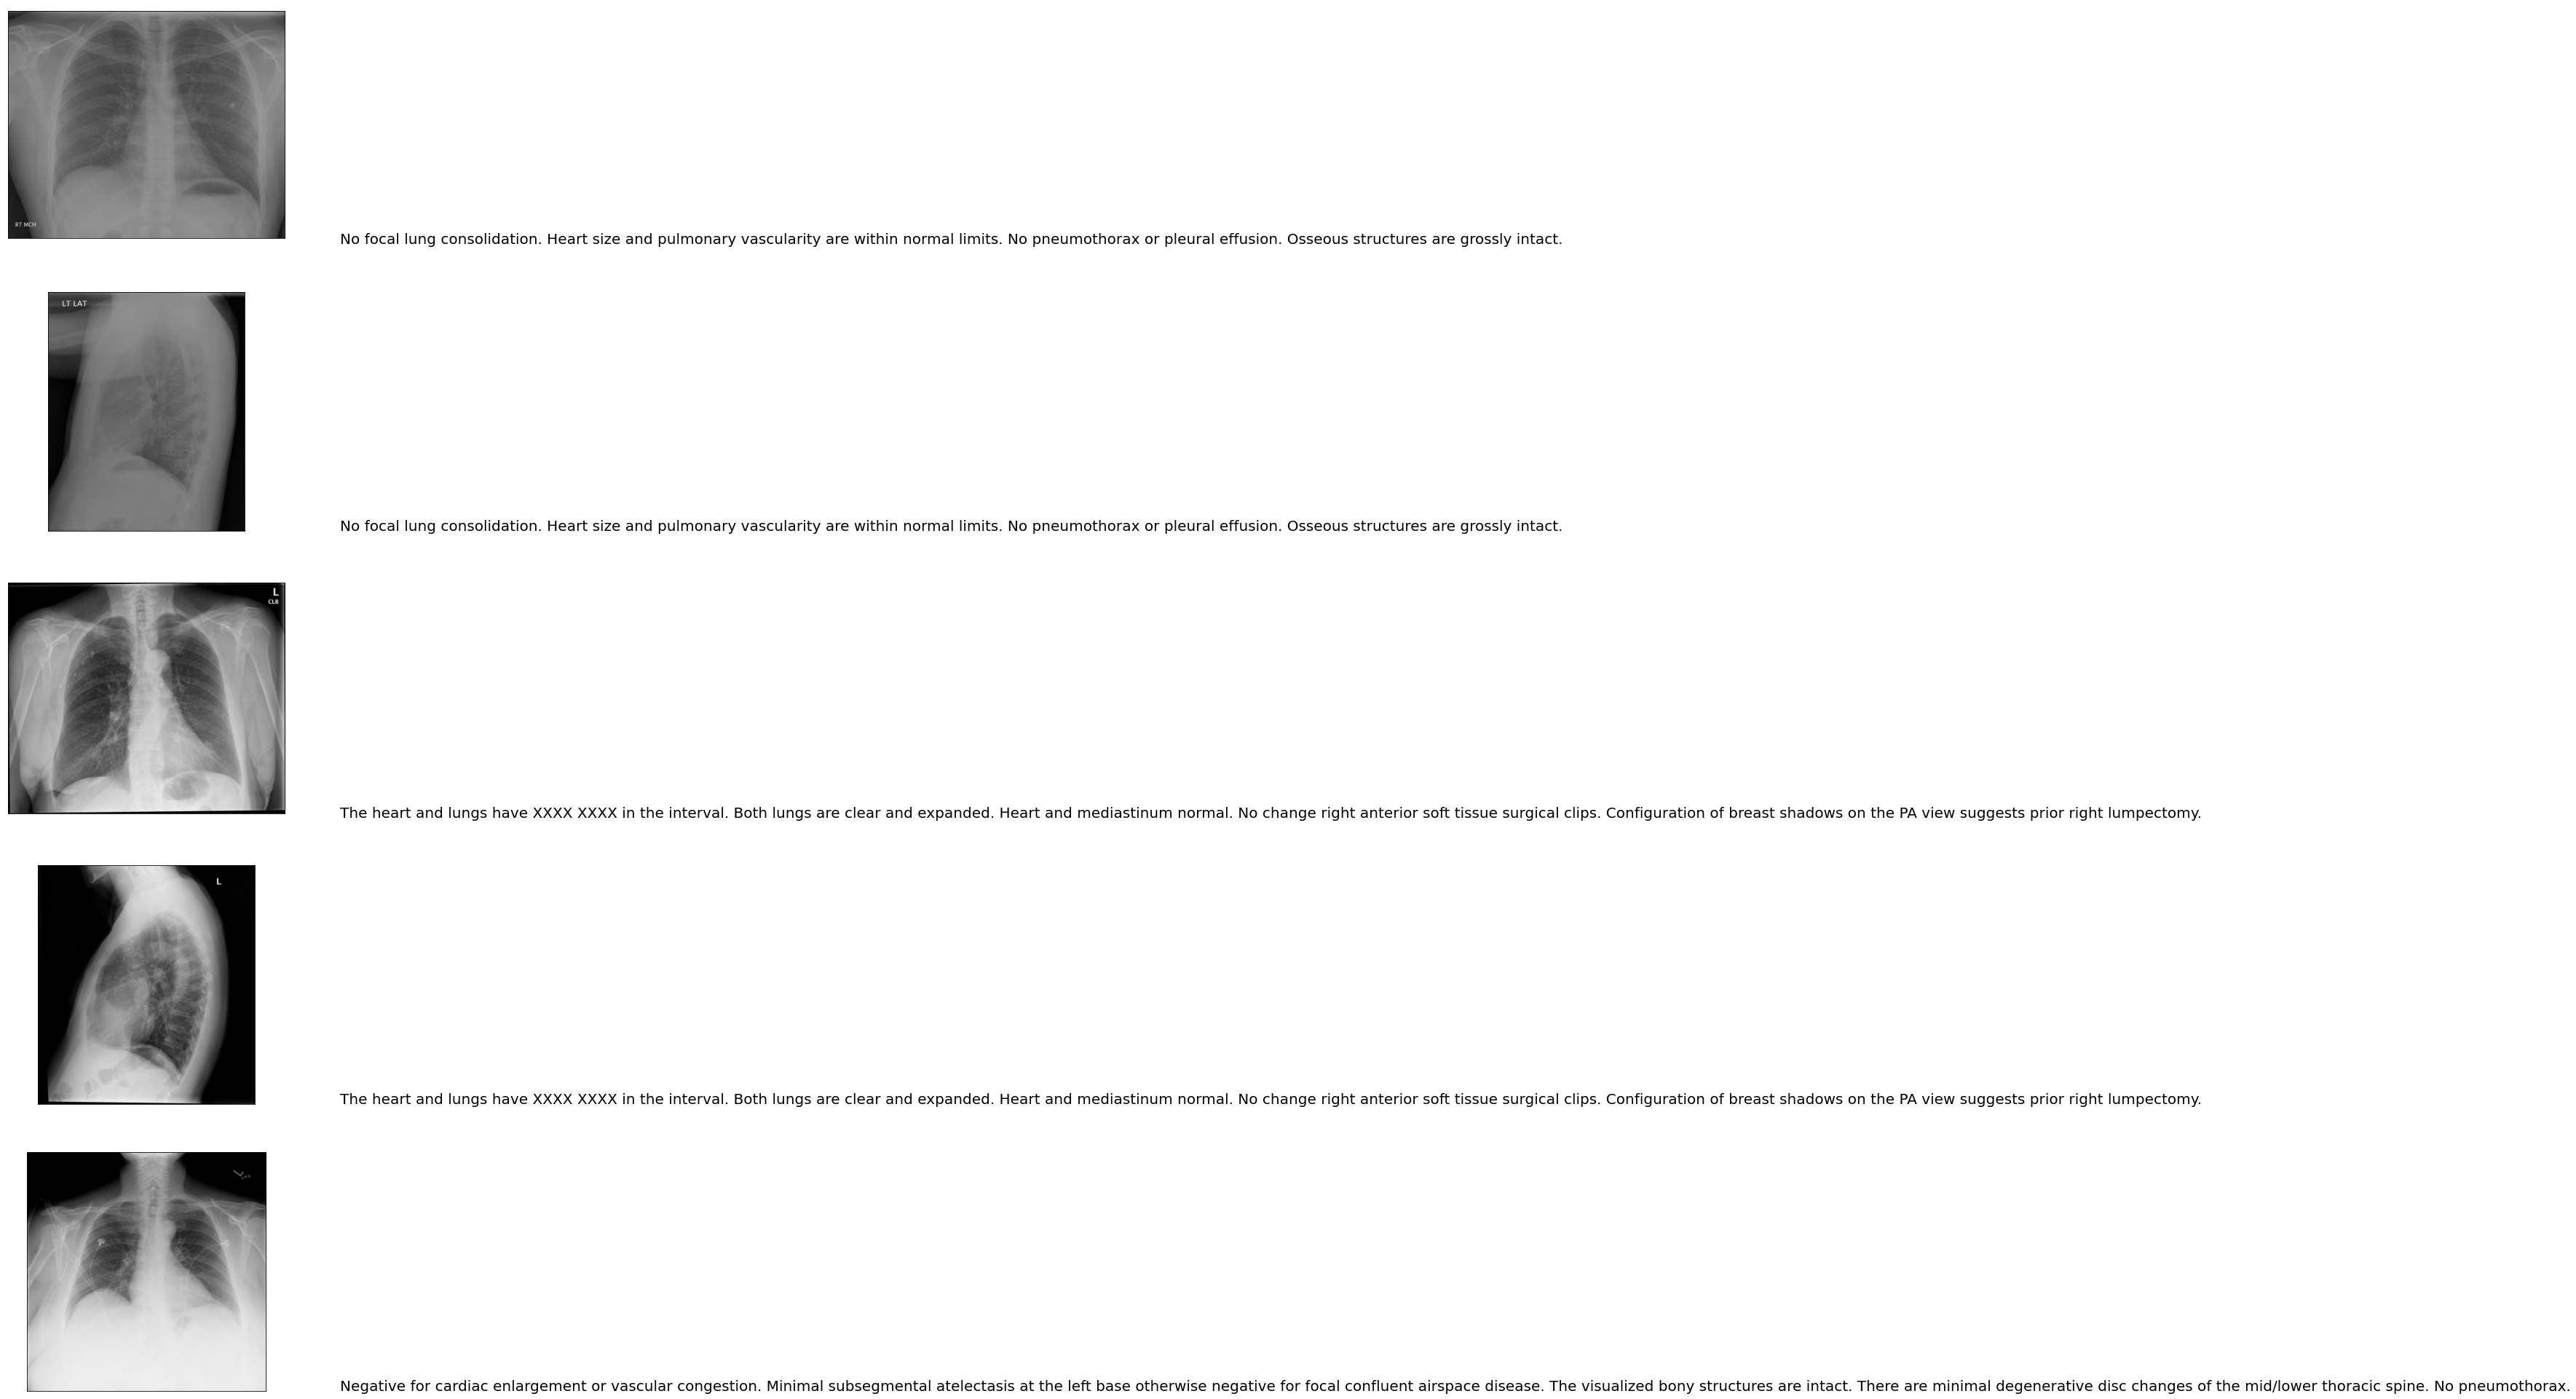

In [ ]:
count = 1  
fig = plt.figure(figsize=(15,35))

for filename in df['Image_path'].values[95:100]:
    findings = list(df["findings"].loc[df["Image_path"] == filename].values)
    img = cv2.imread(filename)    
    ax = fig.add_subplot(5, 2 , count , xticks=[], yticks=[])  
    ax.imshow(img)
    count += 1
    ax = fig.add_subplot(5 ,2 ,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(findings))
    for i, f in enumerate(findings):
        ax.text(0,i,f,fontsize=20)
    count += 1 
plt.show()

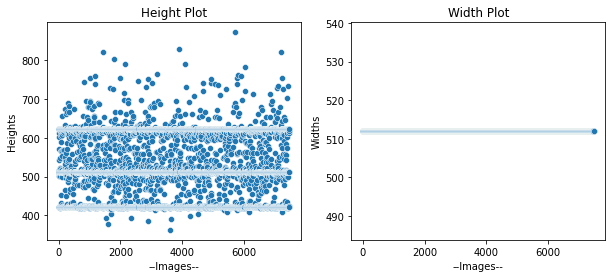

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(range(len(df.height.values)), df.height.values)
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(range(len(df.width.values)), df.width.values)

In [ ]:
# number of missing values
df.isnull().sum()

image_id         0
caption          0
comparison    1157
indication     159
findings       997
impression      52
height           0
width            0
Image_path       0
dtype: int64

In [ ]:
data = df[['image_id','findings','height','width','Image_path']]

In [ ]:
data.shape

(7470, 5)

In [ ]:
data.isnull().sum()

image_id        0
findings      997
height          0
width           0
Image_path      0
dtype: int64

In [ ]:
data = data.dropna(axis=0) # drop all missing value rows

In [ ]:
data.shape

(6473, 5)

In [ ]:
data.isnull().sum()

image_id      0
findings      0
height        0
width         0
Image_path    0
dtype: int64

'XXXX XXXX and lateral chest examination was obtained. The heart silhouette is normal in size and contour. Aortic XXXX appear unremarkable. Lungs demonstrate no acute findings. There is no effusion or pneumothorax. No displaced rib fracture visualized.'

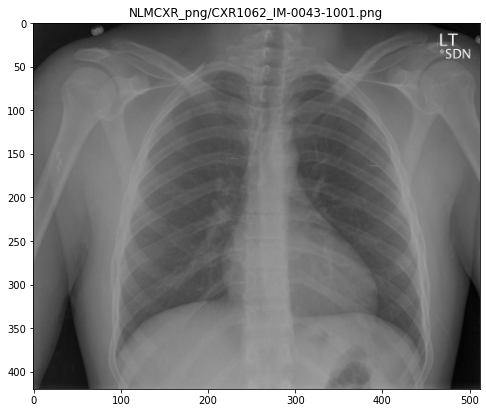

In [ ]:
plt.figure(figsize=(8,7))
img = cv2.imread(data['Image_path'].values[5])
plt.imshow(img)
plt.title(data['Image_path'].values[5])

data['findings'].values[5]

In [ ]:
data.Image_path

0        NLMCXR_png/CXR1082_IM-0058-1001.png
3        NLMCXR_png/CXR1883_IM-0572-1001.png
4        NLMCXR_png/CXR1883_IM-0572-2001.png
5        NLMCXR_png/CXR2431_IM-0973-1001.png
6        NLMCXR_png/CXR2431_IM-0973-2001.png
                        ...                 
7465     NLMCXR_png/CXR2421_IM-0965-2001.png
7466     NLMCXR_png/CXR3165_IM-1490-1001.png
7467    NLMCXR_png/CXR3165_IM-1490-13013.png
7468     NLMCXR_png/CXR1108_IM-0075-1001.png
7469     NLMCXR_png/CXR1108_IM-0075-2001.png
Name: Image_path, Length: 6473, dtype: object

In [ ]:
images = {}
findings = {}

for img,fin in data[['Image_path','findings']].values:
    a = img.split('.')
    file_type = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else: 
        images[a] += 1
        findings[a] = fin

In [ ]:
images['NLMCXR_png/CXR1001_IM-0004'],findings['NLMCXR_png/CXR1001_IM-0004']

(2,
 'Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal.')

In [ ]:
print('Total Number of Unique_IDs :', len(images.keys()))

Total Number of Unique_IDs : 3350


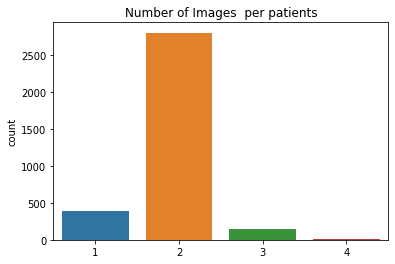

In [ ]:
plt.title('Number of Images  per patients')
sns.countplot(list(images.values()))

In [ ]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [ ]:
def combining_images(image_set):
    
    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['Image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [ ]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [ ]:
img_per_person_train['NLMCXR_png/CXR1001_IM-0004']

['NLMCXR_png/CXR1001_IM-0004-1001.png', 'NLMCXR_png/CXR1001_IM-0004-1002.png']

In [ ]:
def load_image(file):
    img = cv2.imread(file)
    return img

In [ ]:
# just checking the ID which has 4 images
for k,v in images.items():
    if v == 4:
        print(k)
        break
        

NLMCXR_png/CXR1102_IM-0069


Text(0.5, 1.0, 'NLMCXR_png/CXR1102_IM-0069-4004.png')

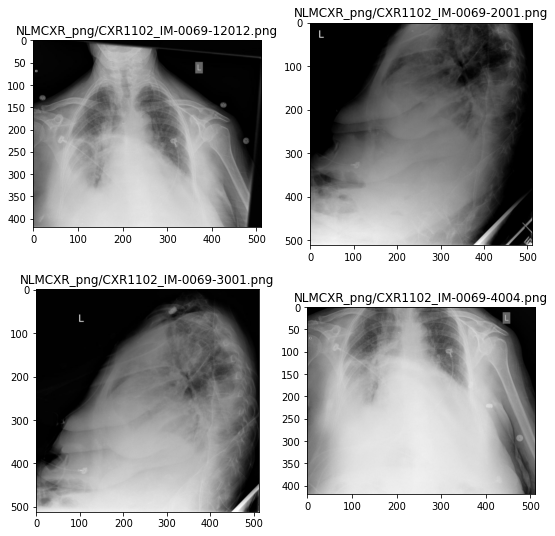

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-12012.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-12012.png')
plt.subplot(222)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-2001.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-2001.png')
plt.subplot(223)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-3001.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-3001.png')
plt.subplot(224)
plt.imshow(load_image('NLMCXR_png/CXR1102_IM-0069-4004.png'))
plt.title('NLMCXR_png/CXR1102_IM-0069-4004.png')


2 side view and 2 front view images for the same ID

Sample chest scans of a person(4 images)

Now, we have multiple chest scans to produce a single report. Some person_ids have 1, some have 2 and the highest is 4. So we can take pairs of those images as input. If it has only one image, then it can be replicated.

# Data Preperation

In [ ]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report
    
    return data

In [ ]:
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
cv = create_data(img_per_person_cv)

In [ ]:
train.head()

,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR1082_IM-0058,NLMCXR_png/CXR1082_IM-0058-1001.png,NLMCXR_png/CXR1082_IM-0058-1001.png,Stable cardiomegaly. Stable tortuosity of the ...
1,NLMCXR_png/CXR1883_IM-0572_0,NLMCXR_png/CXR1883_IM-0572-1001.png,NLMCXR_png/CXR1883_IM-0572-2001.png,Frontal and lateral views of the chest show no...
2,NLMCXR_png/CXR2431_IM-0973_0,NLMCXR_png/CXR2431_IM-0973-1001.png,NLMCXR_png/CXR2431_IM-0973-2001.png,Lungs are clear. No focal airspace consolidati...
3,NLMCXR_png/CXR1062_IM-0043,NLMCXR_png/CXR1062_IM-0043-1001.png,NLMCXR_png/CXR1062_IM-0043-1001.png,XXXX XXXX and lateral chest examination was ob...
4,NLMCXR_png/CXR224_IM-0837_0,NLMCXR_png/CXR224_IM-0837-1001.png,NLMCXR_png/CXR224_IM-0837-2001.png,Clear lungs. Normal heart. No pneumothorax. No...


In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')
cv.to_csv('cv.csv')

# Preporcessing text data

In [ ]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [ ]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [ ]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cv['Report'] = text_preprocessing(cv['Report'])

In [ ]:
train

,Person_id,Image1,Image2,Report
0,NLMCXR_png/CXR1082_IM-0058,NLMCXR_png/CXR1082_IM-0058-1001.png,NLMCXR_png/CXR1082_IM-0058-1001.png,stable cardiomegaly . stable tortuosity the a...
1,NLMCXR_png/CXR1883_IM-0572_0,NLMCXR_png/CXR1883_IM-0572-1001.png,NLMCXR_png/CXR1883_IM-0572-2001.png,frontal and lateral views the chest show norma...
2,NLMCXR_png/CXR2431_IM-0973_0,NLMCXR_png/CXR2431_IM-0973-1001.png,NLMCXR_png/CXR2431_IM-0973-2001.png,lungs are clear . no focal airspace consolida...
3,NLMCXR_png/CXR1062_IM-0043,NLMCXR_png/CXR1062_IM-0043-1001.png,NLMCXR_png/CXR1062_IM-0043-1001.png,and lateral chest eamination was obtained . t...
4,NLMCXR_png/CXR224_IM-0837_0,NLMCXR_png/CXR224_IM-0837-1001.png,NLMCXR_png/CXR224_IM-0837-2001.png,clear lungs . normal heart . no pneumothora ...
...,...,...,...,...
2759,NLMCXR_png/CXR2725_IM-1186_0,NLMCXR_png/CXR2725_IM-1186-1001.png,NLMCXR_png/CXR2725_IM-1186-2001.png,cardiac and mediastinal contours are within no...
2760,NLMCXR_png/CXR728_IM-2287_0,NLMCXR_png/CXR728_IM-2287-1001.png,NLMCXR_png/CXR728_IM-2287-2001.png,the interval diameter nodule has developed the...
2761,NLMCXR_png/CXR943_IM-2439_0,NLMCXR_png/CXR943_IM-2439-3003.png,NLMCXR_png/CXR943_IM-2439-5005.png,heart size cardiomediastinal silhouette and pu...
2762,NLMCXR_png/CXR3379_IM-1627_0,NLMCXR_png/CXR3379_IM-1627-1001.png,NLMCXR_png/CXR3379_IM-1627-2001.png,no pneumothora large pleural effusion . borde...


In [ ]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
cv.to_csv('processed_cv.csv')

In [ ]:
l = [len(e.split()) for e in train['Report'].values]  # Number of words in each report

In [ ]:
print('maximum word in a report is :',max(l))

maximum word in a report is : 153


Text(0, 0.5, 'Number of words')

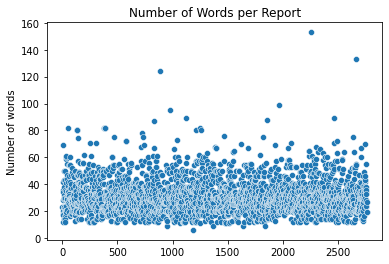

In [ ]:
plt.title('Number of Words per Report')
sns.scatterplot(range(train.shape[0]), l)
plt.ylabel('Number of words')


Most of the reports contain word count below 100

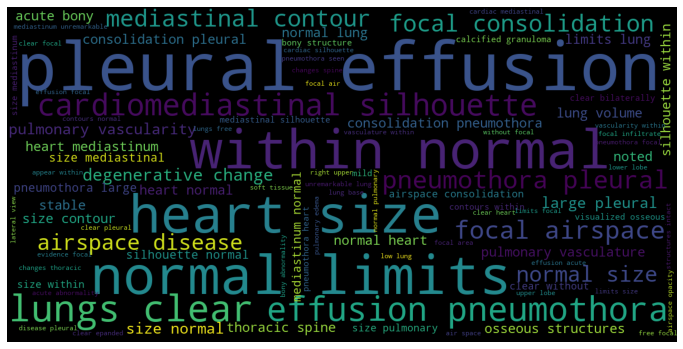

In [ ]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['Report'])

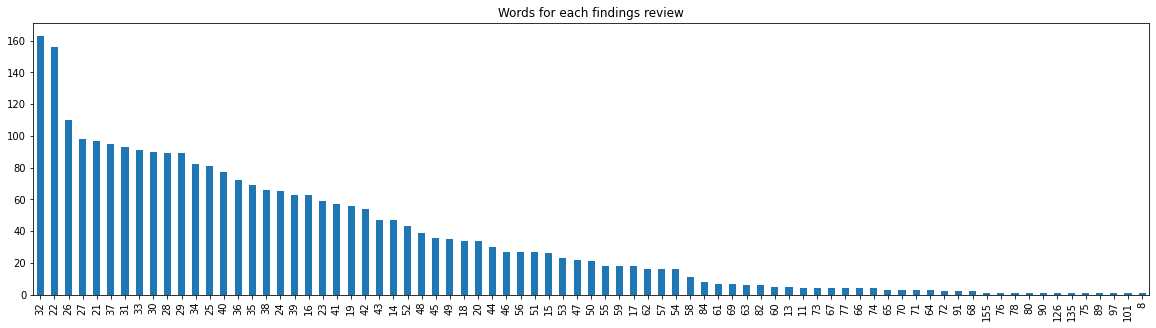

In [ ]:
countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words for each findings review')

In [ ]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [ ]:
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cv['Report'] = cv['Report'].apply(lambda x : remodelling(x))

# Exporting final dataset to csv file

In [ ]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('Final_Train_Data.csv', index=False)
test.to_csv('Final_Test_Data.csv', index=False)
cv.to_csv('Final_CV_Data.csv', index=False)